In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

## 방향성 선정
- 진행과정 : 데이터 전처리 -> 머신러닝 모델 분류 -> 방향성 생각

## 데이터 전처리

### 1. 결측값, 이상값 처리

In [3]:
df_heart = pd.read_csv("../dataset/heart_2020_cleaned.csv")
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df_heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# 이상치 확인 (# BMI: BMI 수치, # PhysicalHealth, MentalHealth: 날짜, SleepTime : 수면시간)
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<Axes: ylabel='BMI'>

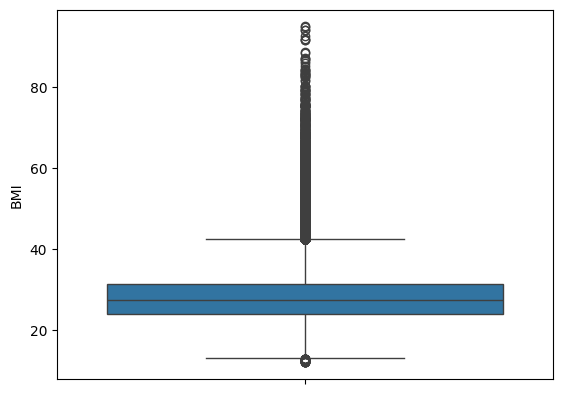

In [6]:
sns.boxplot(data = df_heart["BMI"])

In [7]:
# 이상치 확인 (# BMI: BMI 수치, # PhysicalHealth, MentalHealth: 날짜, SleepTime : 수면시간)
df_heart.describe()
# BMI 사분위수 범위 적용
Q1 = 24.030000
Q3 = 31.420000
IQR = Q3-Q1
print(Q1-1.5*IQR, Q3+1.5*IQR)

12.945 42.505


In [8]:
condition_bmi = "12.945 <= BMI <= 42.505"

df_heart_stable = df_heart.query(condition_bmi)
df_heart_stable

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


### 2. 레이블 인코딩

In [9]:
# 데이터 프레임 타입 확인
df_heart_stable.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
# 레이블 인코딩을 수행할 컬럼들을 선택
columns_to_encode = ["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex",'AgeCategory', "Race", "Diabetic","PhysicalActivity", "GenHealth","Asthma","KidneyDisease","SkinCancer"]

for column in columns_to_encode:
    df_heart_stable[column] = label_encoder.fit_transform(df_heart_stable[column])

# 변환된 데이터프레임 출력
df_heart_stable

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,0,3,0,1,0,8.0,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0


In [12]:
df_heart_stable.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

## 머신러닝 모델 선정

### 0. 훈련용/시험용 데이터셋

In [13]:
df_heart_stable.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [14]:
# 훈련용, 시험용 데이터셋 설정
from sklearn.model_selection import train_test_split
labeled_x= df_heart_stable.drop(columns=['HeartDisease'])
labeled_y= df_heart_stable['HeartDisease']
labeled_x_train,labeled_x_test= train_test_split(labeled_x,test_size=0.3,random_state=42)
labeled_y_train,labeled_y_test= train_test_split(labeled_y,test_size=0.3,random_state=42)

### 1. 모델 : 로지스틱 회귀

In [15]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# 훈련용 데이터 학습 
logisticRegression=linear_model.LogisticRegression()
logisticRegression.fit(labeled_x_train,labeled_y_train)

# 탐색할 하이퍼파라미터 설정
param_grid= {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search= GridSearchCV(logisticRegression, param_grid, cv=5)
grid_search.fit(labeled_x_train, labeled_y_train)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
logistic_best_model= grid_search.best_estimator_

최적 하이퍼파라미터: {'C': 0.1, 'penalty': 'l2'}


In [16]:
labeled_y_test_predict= logistic_best_model.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84934
           1       0.53      0.11      0.18      7886

    accuracy                           0.92     92820
   macro avg       0.73      0.55      0.57     92820
weighted avg       0.89      0.92      0.89     92820



### 2. SMOTE Oversampling
- SMOTE는 데이터 불균형 해결 방법 중 적은 수의 라벨 측에 포함된 데이터 샘플 수를 늘리는 대표적인 오버 샘플링 기법 중 하나로, 샘플링된 데이터에 대하여 k-최근접 이웃을 고른 뒤, 해당 점과 이웃 점들을 선분으로 잇고 이 선분들 위에서 임의의 점을 골라 새로운 샘플로 취급하는 알고리즘입니다.

In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from imblearn.over_sampling import SMOTE
sampling_x, sampling_y = SMOTE(random_state = 22).fit_resample(labeled_x, labeled_y)
sampling_x.shape, sampling_y.shape

((566418, 17), (566418,))

In [19]:
from sklearn.model_selection import train_test_split
sampling_x_train, sampling_x_test = train_test_split(sampling_x,test_size=0.3,random_state=2)
sampling_y_train, sampling_y_test = train_test_split(sampling_y,test_size=0.3,random_state=2)
sampling_x_train.shape,sampling_x_test.shape,sampling_y_train.shape,sampling_y_test.shape

((396492, 17), (169926, 17), (396492,), (169926,))

In [20]:
logistic_best_model.fit(sampling_x_train,sampling_y_train)

LogisticRegression(C=0.1)

In [21]:
sampling_y_train_predict= logistic_best_model.predict(sampling_x_train)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(sampling_y_train, sampling_y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72    198307
           1       0.72      0.77      0.74    198185

    accuracy                           0.73    396492
   macro avg       0.74      0.73      0.73    396492
weighted avg       0.74      0.73      0.73    396492



In [22]:
sampling_y_test_predict= logistic_best_model.predict(sampling_x_test)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(sampling_y_test, sampling_y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     84902
           1       0.72      0.77      0.75     85024

    accuracy                           0.74    169926
   macro avg       0.74      0.74      0.73    169926
weighted avg       0.74      0.74      0.73    169926



## 결과
- 데이터의 SMOTE를 이용한 오버샘플링을 통해 데이터 조정
- precision / recall
  + 0(심장병 없음) : 0.75 / 0.70
  + 1(심장병 있음) : 0.72 / 0.77
- 이전 모델에 비해 70% 이상의 준수한 성능을 보임.